# Data feature analysis
**数据特征分析**
# 基础分析思路
- 分布分析:查看小区的朝向分布情况、房价的分布区间、房价的分布占比
    - 知识点
        - 散点图的绘制
        - 表格柱状图绘制
        - 表格文字标签的添加
- 对比分析
    - 绝对数比较：类似于两个商品的分布分析，但是存在一个差值分析，两个竞品的销售额差值也可以说明一些问题
    - 相对数比较
        - 结构分析：在分组的基础上，各组总量指标与总体的总量指标对比，计算出各组数据在总量中的所占比重，同时可以反映“强度”，两个性质不同但有一定联系的总量指标对比，用来说明强度、密度等。比如国内生产总值 元/人、人口密度 人/平方公里
        - 比例分析：总体不同部分的指标数值进行对比，如收入与消费之间的比值。
        - 空间比较分析：单从我国经济总量的增加可以说明一些问题，但是如果从人均水平来看是另一回事。将各个国家同一时间段的数据绘制柱状图进行比较
        - 动态对比分析：逐期发展速度=当前的销售额/上一时期的销售额、累计增长量（划定一个基本水平计算每个时期的增长量为多少，或者与去年同期相比较增长了多少），如上所述存在增长量和增长速度两个方面。
    - 知识点
        - period_range()生成时间分布序列
        - 多变量折线图
        - 多变量柱状图
        - 面积图
- 统计分析：对定量数据进行统计描述，常从集中趋势和离中趋势两个方面在进行分析
    - 集中趋势度量
        - 算数平均数：加权算数平均数
        - 位置平均数：众数、中位数、平均值、密度曲线（y轴标记）
    - 离中趋势度量
        - 极差
        - 分位差
            - 箱线图
        - 方差
            - 密度曲线
        - 标准差
    - describe() ：用来展示数据的一些描述性统计信息,其物理意义在于观察这一系列数据的范围、大小、波动趋势等，便于判断后续对数据采取哪种处理类型更合适。
- 帕累托分析：28法则，挖掘关键的决定性的数据
    - 如何通过计算累计占比来获取关系数据的位置
    - 如何在柱状图中创建副坐标做折线图
    - loc()的使用方法
- 正态性检测:利用观测数据判断总体是否服从正态分布的检验称为正态性检验，它是统计判决中重要的一种特殊的拟合优度假设检验。
    -  直方图&折线图 ， 散点图
    - QQ图
    - K-S检验
        - 双曲线图：如何划分不同的曲线颜色和样式
        - scipy做ks检验
        - sort_index()\value_counts()的组合用法
- 相关性分析:分析连续变量之间的线性相关程度的强弱
    - 散点图矩阵的做法
    - 线性相关性
        - 正相关
        - 负相关
    - Perason 相关系数


#  一 分布分析 房价的分布区间和朝向做图

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## A-1 散点图 

房屋编码      int64
小区       object
朝向       object
房屋单价      int64
参考首付    float64
参考总价    float64
经度      float64
纬度      float64
dtype: object
--------------
数据长度为75条 


,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370


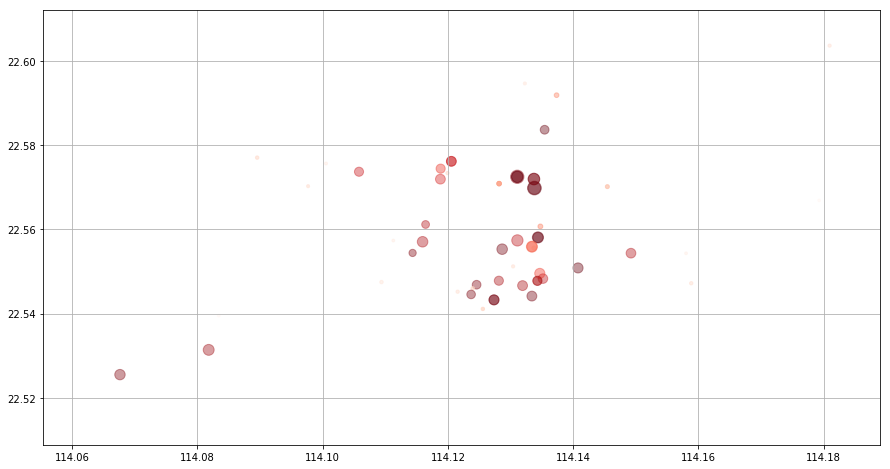

In [2]:
data = pd.read_csv('Data/深圳罗湖二手房信息.csv',engine ='python')
plt.figure(figsize=(15,8))
plt.scatter(data['经度'],data['纬度'],  # 按照经纬度显示
            s = data['房屋单价']/500,  # 按照单价显示大小
            c = data['参考总价'],  # 按照总价显示颜色
            alpha = 0.4, cmap = 'Reds')  
plt.grid()
print(data.dtypes)
print("--------------\n数据长度为%i条 "%len(data))
data.head()
# 通过数据可见 ，一共8个字段
# 定量字段：房屋单价，参考首付，参考总价，*经度，*纬度，*房屋编码
# 定性字段：小区，朝向

## A-2 极差

In [3]:
# 极差
# 函数传递参数方法
def d_range(df,*cols):
    krange=[]
    for col in cols:
        crange=df[col].max() -df[col].min()
        krange.append(crange)
    return (krange)
key1='参考总价'
key2='参考首付'

dr = d_range(data,key1,key2)
print("%s 极差为：%f,\n%s极差为：%f" %(key1,dr[0],key2,dr[1]))

参考总价 极差为：175.000000,
参考首付极差为：52.500000


## A-3直方图 概率分布

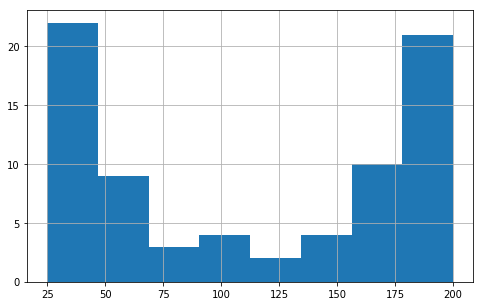

In [4]:
# 频率分布情况
# 1. 通过直方图来判断分组组数

#bins = 8 意思是8个直方
plt.figure(figsize=(8,5))
data[key1].hist(bins = 8 )
# plt.figure(figsize=(8,6))
# data[key2].hist(bins = 8 )
# 简单查看数据分布，确定分布组数 一般8-16组即可
# 这里以10组为参考

In [5]:
# 频率分布情况 
# 2. 求出分组区间
# 切割 data[key1] 成10分 right是去掉末尾数据部分的意思 切割完之后是是dataFrame
# pd.cut(x, bins, right)：按照组数对x分组，且返回一个和x同样长度的分组dataframe，right → 是否右边包含，默认True
gcut = pd.cut(data[key1],10,right=False)

# 统计gcut有哪些不同的值 并计算每个值有多少个重复值 这里的值其实是统计区间有多少个不同的分区
gcut_count = gcut.value_counts(sort=False) # 不排序
data['%s 分组区间' %key2] = gcut.values # 上面的统计和不排序是关键 这样子才能将划分好的区间在添加到data里去
print(gcut.head(),'\n-----')
print(gcut_count)
data.head()
# 通过groupby查看不同组的数据频率分布
# 给源数据data添加“分组区间”列

0      [42.5, 60.0)
1      [25.0, 42.5)
2      [42.5, 60.0)
3      [25.0, 42.5)
4    [165.0, 182.5)
Name: 参考总价, dtype: category
Categories (10, interval[float64]): [[25.0, 42.5) < [42.5, 60.0) < [60.0, 77.5) < [77.5, 95.0) ... [130.0, 147.5) < [147.5, 165.0) < [165.0, 182.5) < [182.5, 200.175)] 
-----
[25.0, 42.5)        14
[42.5, 60.0)        17
[60.0, 77.5)         1
[77.5, 95.0)         2
[95.0, 112.5)        4
[112.5, 130.0)       2
[130.0, 147.5)       3
[147.5, 165.0)       4
[165.0, 182.5)       8
[182.5, 200.175)    20
Name: 参考总价, dtype: int64


,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度,参考首付 分组区间
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698,"[42.5, 60.0)"
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910,"[25.0, 42.5)"
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223,"[42.5, 60.0)"
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343,"[25.0, 42.5)"
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370,"[165.0, 182.5)"


In [6]:
# 频率分布情况
# 3。 求出目标字段下频率下频率分布的其他统计量 频率 频数 累计频率

rzj=pd.DataFrame(gcut_count)
# 重命名
rzj.columns= pd.Series(['频数'])
# rzj.rename(columns = {gcut_count.name:'频数'},inplace=True)
# 频率就等于频数/求和
rzj['频率']= rzj['频数']/rzj['频数'].sum()
# 求之前的评论的和 也就是累计频率
rzj['累计频率'] = rzj['频率'].cumsum()
#构建跟家直观的百分比频率 字符串中的% 必须是双%% 使用 apply()
rzj['频率%']= rzj['频率'].apply(lambda x:'%.2f%%' %(x*100))
# 设置可视化的表格展示
rzj.style.bar(subset=['频率','累计频率'],color='red',width=100)

,频数,频率,累计频率,频率%
"[25.0, 42.5)",14,0.186667,0.186667,18.67%
"[42.5, 60.0)",17,0.226667,0.413333,22.67%
"[60.0, 77.5)",1,0.0133333,0.426667,1.33%
"[77.5, 95.0)",2,0.0266667,0.453333,2.67%
"[95.0, 112.5)",4,0.0533333,0.506667,5.33%
"[112.5, 130.0)",2,0.0266667,0.533333,2.67%
"[130.0, 147.5)",3,0.04,0.573333,4.00%
"[147.5, 165.0)",4,0.0533333,0.626667,5.33%
"[165.0, 182.5)",8,0.106667,0.733333,10.67%
"[182.5, 200.175)",20,0.266667,1,26.67%


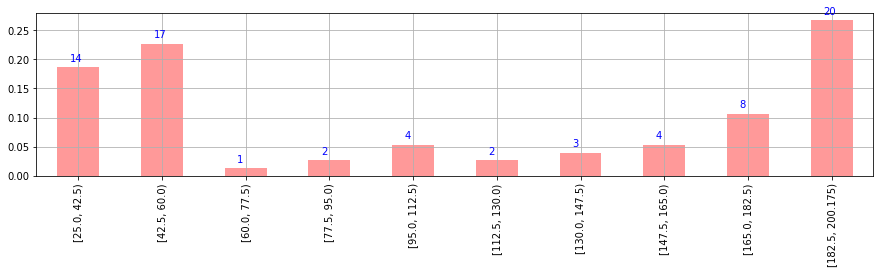

In [7]:
# 频率分布情况
# 4 直方图
rzj['频率'].plot(kind='bar',
             figsize=(15,3),
             grid=True,
             color='r',
             alpha=0.4,)
x=len(rzj)
y = rzj['频率']
m = rzj['频数']
# 添加频率标签
for i,j,k in zip(range(x),y,m):
    # 前两个参数代表位置 后面一个参数代表文字 color表示颜色
    plt.text(i-0.1,j+0.01,'%i' %k,color='b')

In [8]:
# 频率分布情况 定性字段
# 5. 通过计数统计朝向判断不同类别的频率

# 统计频率
cx_g = data['朝向'].value_counts(sort=True)
# cx_g

# 将数据转换为 DataFrame格式
rcx = pd.DataFrame(cx_g)
# 重命名列名
rcx.columns =pd.Series(['朝向频数'])

rcx['频率'] = rcx['朝向频数']/rcx['朝向频数'].sum() # 求频率
rcx['累计频率'] = rcx['频率'].cumsum()# 计算累计频率
rcx['频率%'] = rcx['频率'].apply(lambda x:"%.2f%%" %(x*100)) #以百分比显示频率
rcx['累计频率%'] = rcx['累计频率'].apply(lambda x:"%.2f%%" %(x*100)) #以百分比显示累计频率
rcx.style.bar(subset=['频率','累计频率'],color='red',width=100)

,朝向频数,频率,累计频率,频率%,累计频率%
南北,29,0.386667,0.386667,38.67%,38.67%
南,20,0.266667,0.653333,26.67%,65.33%
东,8,0.106667,0.76,10.67%,76.00%
东南,5,0.0666667,0.826667,6.67%,82.67%
北,4,0.0533333,0.88,5.33%,88.00%
西南,4,0.0533333,0.933333,5.33%,93.33%
西北,3,0.04,0.973333,4.00%,97.33%
东北,1,0.0133333,0.986667,1.33%,98.67%
东西,1,0.0133333,1,1.33%,100.00%


(-1.1101621526291232,
 1.1004839130571389,
 -1.1062755172910221,
 1.1205348076125872)

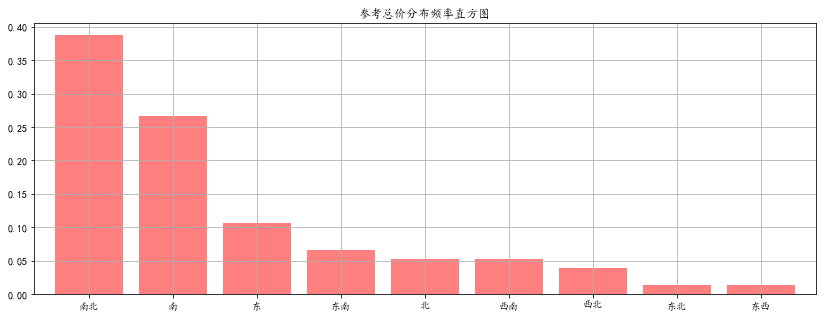

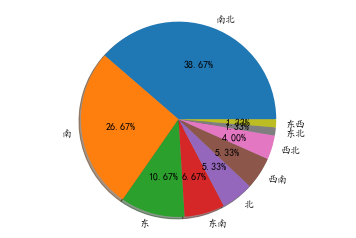

In [9]:
# 频率分布情况 
# 6 绘制频率直方图 饼图
# 无法显示中文的代码
plt.rcParams['font.sans-serif'] = ['KaiTi']
plt.rcParams['font.serif'] = ['KaiTi']

# 设置图片大小和数量
plt.figure(num=1,figsize=(14,5))
# 直接使用plot来绘直方图
rcx['频率'].plot(
         kind = 'bar',
         width = 0.8,
         rot = 0,
         color = 'r',
         grid = True,
         alpha = 0.5
    )
plt.title('参考总价分布频率直方图')

# 饼图
plt.figure(num = 2)
plt.pie(rcx['朝向频数'],
       labels = rcx.index,
       autopct='%.2f%%',
       shadow = True)
plt.axis('equal')

#  二、 对比分析
两个相互联系的指标进行比较<br>
绝对数比较（相减）/相对数比较（相除）<br>
- 结构分析
- 比例分析
- 空间比较分析
- 动态对比分析

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## B1 绝对数比较-折线图 多系列柱状图
绝对数比较-相减<br>
相互比较的指标在量级上不能相差太大
1. 折线图比较
2. 多系列柱状图比较


                A_sale      B_sale
2017-06-01  519.540546  722.587727
2017-06-02  731.223415  645.515252
2017-06-03  397.968694   66.948575
2017-06-04  524.741485  685.135521
2017-06-05  237.480653  469.007655


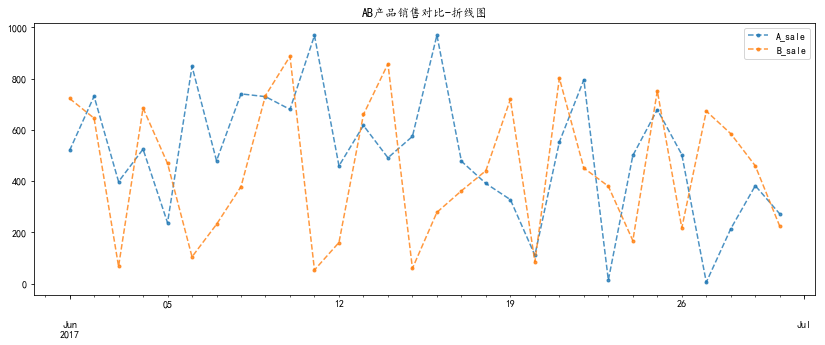

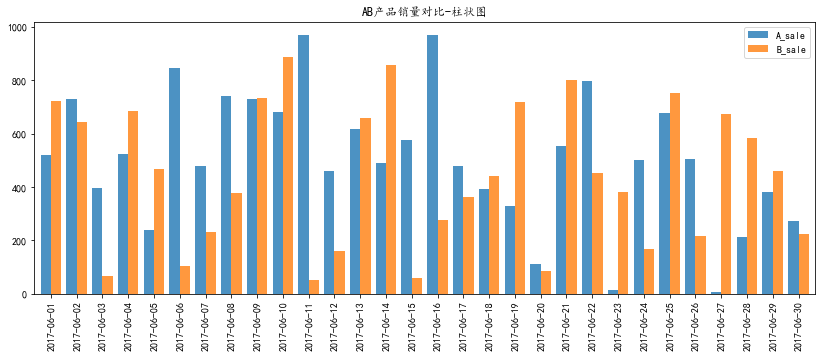

In [11]:
# 创建数据 30天内A/B产品的日销售额
# np.random.rand(30,2)生成一个 30行2列 的数据 这些数据全部小于1
# 使用了period_range()来生成时间列表
data = pd.DataFrame(np.random.rand(30,2)*1000,
                    # 设置列名
                   columns = ['A_sale','B_sale'],
                    # index 从0601-0630来分布
                   index = pd.period_range('20170601','20170630'))
print(data.head())

# 折线图比较
data.plot(kind='line',
         style='--.',
         alpha=0.8,
         figsize =(14,5),
          title='AB产品销售对比-折线图'
         )

# 多系列柱状图比较
data.plot(
    kind='bar',
    width = 0.8,
    alpha= 0.8,
    figsize=(14,5),
    title='AB产品销量对比-柱状图'
)

## B2 绝对值比较- 柱状堆叠图 差值折线图比较
知识点
- subplots_adjust() 设置子图间隔
- add_subplot() 设置子图排列方式，[参考文章](https://blog.csdn.net/yl_best/article/details/86511599#%E2%80%8B%E2%80%8B%E2%80%8B%E2%80%8B%E2%80%8B%E2%80%8B%E2%80%8Bsubplots_adjust)

<br>示例：<br>
add_subplot(321)

|0|1|
|:---|:---:|
|(3,2,1)|(3,2,2)|
|(3,2,3)|(3,2,4)|
|(3,2,5)|(3,2,6)|


[Text(0, 0, '2017-06-01'),
 Text(0, 0, '2017-06-07'),
 Text(0, 0, '2017-06-13'),
 Text(0, 0, '2017-06-19'),
 Text(0, 0, '2017-06-25')]

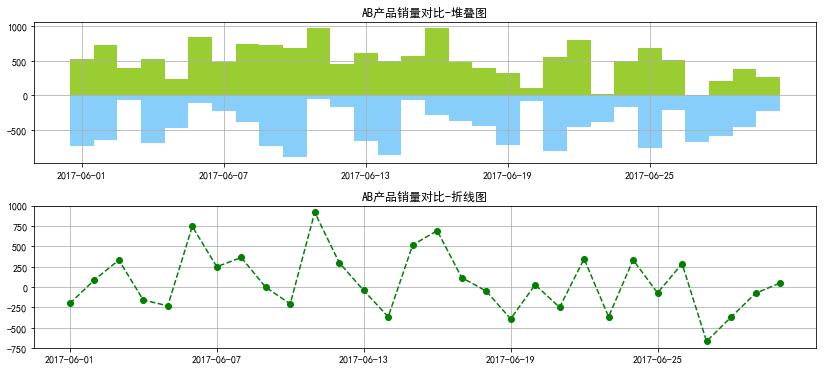

In [12]:
# 创建子图和间隔设置
fig3 = plt.figure(figsize=(14,6))
plt.subplots_adjust(hspace=0.3)

plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus']=False  # 显示负号

# 创建堆叠图
# 添加子图
ax1=fig3.add_subplot(2,1,1)
x = range(len(data))
y1=data['A_sale']
# 添加负号 相反方向展示
y2=-data['B_sale']
plt.bar(x,y1,width=1,facecolor='yellowgreen')
plt.bar(x,y2,width=1,facecolor='lightskyblue')
plt.title("AB产品销量对比-堆叠图")
# 方格
plt.grid()

# 设置步长 要不然不会均匀显示30个的txtlabels
plt.xticks(range(0,30,6))
ax1.set_xticklabels(data.index[::6])

# 创建差值折线图
ax2= fig3.add_subplot(2,1,2)
y3= data['A_sale'] - data['B_sale']
plt.plot(x,y3,'--go')
plt.grid()
plt.title('AB产品销量对比-折线图')
plt.xticks(range(0,30,6))
ax2.set_xticklabels(data.index[::6])

## B3 相对数比较 柱状图 折线图 面积图
有联系的指标综合计算后的对比，数值为相对数<br>
结构分析、比例分析、空间对比分析、动态对比分析<br>


###  1 结构分析
在分组基础上，各组总量指标与总体的总量指标对比，计算出各组数据在总量中的所占比重，反映总体的内部结构。

                A_sale      B_sale
2017-06-01  940.296309   58.668469
2017-06-02  227.659320   28.109111
2017-06-03  126.485189  183.369400
2017-06-04  991.137379  181.844841
2017-06-05  196.970894   40.721644
----------
                A_sale      B_sale     A_per     B_per A_per% B_per%
2017-06-01  940.296309   58.668469  0.075661  0.004721  7.57%  0.47%
2017-06-02  227.659320   28.109111  0.018319  0.002262  1.83%  0.23%
2017-06-03  126.485189  183.369400  0.010178  0.014755  1.02%  1.48%
2017-06-04  991.137379  181.844841  0.079752  0.014632  7.98%  1.46%
2017-06-05  196.970894   40.721644  0.015849  0.003277  1.58%  0.33%


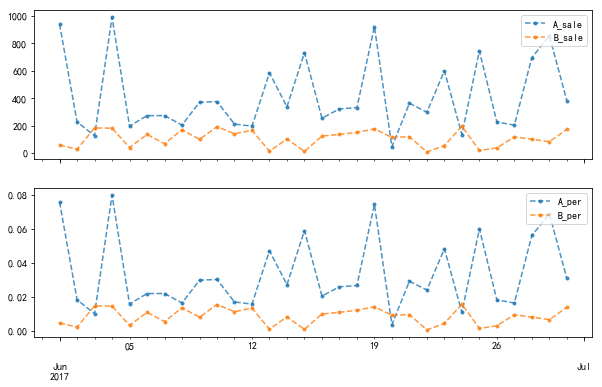

In [13]:
# 创建数据 30天内A/B产品的日销售额
# A/B 产品销售额量级不同
data = pd.DataFrame({'A_sale':np.random.rand(30)*1000,
                    'B_sale':np.random.rand(30)*200},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print("----------")

# 计算出每天的营收占比
data['A_per'] = data['A_sale']/data['A_sale'].sum()
data['B_per']= data['B_sale']/data['A_sale'].sum()
# print(data)

data['A_per%'] = data['A_per'].apply(lambda x : "%.2f%%" %(x*100))
data['B_per%'] = data['B_per'].apply(lambda x : "%.2f%%" %(x*100))
print(data.head())

# 绝对值对比 较难看出结构性变化，通过看销售额占比来看售卖情况的对比
fig,axes = plt.subplots(2,1,figsize = (10,6),sharex=True)
data[['A_sale','B_sale']].plot(kind='line',style = '--.',alpha = 0.8,ax=axes[0])
axes[0].legend(loc = 'upper right')
data[['A_per','B_per']].plot(kind='line',style = '--.',alpha = 0.8,ax=axes[1])
axes[1].legend(loc = 'upper right')
# 同时可以反映 “强度” 两个性质不同但有一定联系的总量指标对比，用来说明强度、密度、普遍程度
# 例如：国内生产总值 元/人 人口密度 人/平方公里

### 2 比例分析
在分组的基础上，将总体不同部分的指标数值进行对比，其相对指标一般称为“比例相对数”<br>
比例相对数 = 总体中某一部分数值 / 总体中另一部分数值 → “基本建设投资额中工业、农业、教育投资的比例”、“男女比例”...

         consumption       salary
2017-01  2995.554073  5312.410456
2017-02  2039.488639  5205.543060
2017-03  2772.995998  5166.263942
2017-04  2979.157134  5114.350266
2017-05  2623.134704  5027.931269
------
         consumption       salary       c_s
2017-01  2995.554073  5312.410456  0.563879
2017-02  2039.488639  5205.543060  0.391792
2017-03  2772.995998  5166.263942  0.536751
2017-04  2979.157134  5114.350266  0.582509
2017-05  2623.134704  5027.931269  0.521713


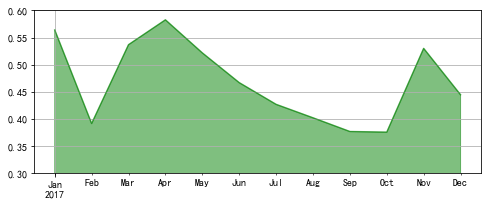

In [14]:
# 创建数据 → 某人一年内的消费、工资薪水情况
# 消费按照2000-3000/月随机，工资按照5000-5500/月随机
data = pd.DataFrame({'consumption':np.random.rand(12)*1000 + 2000,
                    'salary':np.random.rand(12)*500 + 5000},
                   index = pd.period_range('2017/1','2017/12',freq = 'M'))
print(data.head())
print('------')

# 比例相对数 → 消费收入比
data['c_s'] = data['consumption'] / data['salary']
print(data.head())

data['c_s'].plot.area(color = 'green',alpha = 0.5,ylim = [0.3,0.6],figsize=(8,3),grid=True)
# 创建面积图表达

### 3 空间比较分析
空间比较分析（横向对比分析）<br>
同类现象在同一时间不同空间的指标数值进行对比，反应同类现象在不同空间上的差异程度和现象发展不平衡的状况<br>
空间比较相对数 = 甲空间某一现象的数值 / 乙空间同类现象的数值<br>
一个很现实的例子 → 绝对数来看，我国多经济总量世界第一，但从人均水平来看是另一回事<br>

In [16]:
# 创建数据 → 30天内A/B/C/D四个产品的销售情况
# 不同产品的销售量级不同
data = pd.DataFrame({'A':np.random.rand(30)*5000,
                    'B':np.random.rand(30)*2000,
                    'C':np.random.rand(30)*10000,
                    'D':np.random.rand(30)*800},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('------')


                      A            B            C           D
2017-06-01  3384.886101   499.048739  4751.618533  286.953684
2017-06-02  4099.746613  1849.855119  5259.288489  475.902910
2017-06-03   563.053300  1027.034974  8283.284866  113.836543
2017-06-04  3908.074693   293.892119  3139.865952   86.502219
2017-06-05   700.535594  1084.036904  3520.658754  788.626161
------


0 85526.56268188
1 33204.5651496905
2 122660.53998605024
3 13891.803498841971


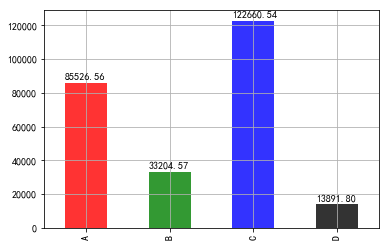

In [23]:
data.sum().plot(kind = 'bar',color = ['r','g','b','k'], alpha = 0.8, grid = True)
for i,j in zip(range(4),data.sum()):
    print(i,j)
    plt.text(i-0.25,j+2000,'%.2f' % j, color = 'k')

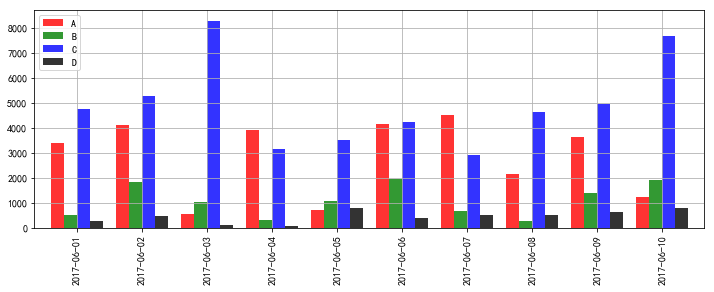

In [24]:
# 关于同比与环比
# 同比 → 产品A在2015.3和2016.3的比较（相邻时间段的同一时间点）
# 环比 → 产品A在2015.3和2015.4的比较（相邻时间段的比较）
# 如何界定“相邻时间段”与“时间点”，决定了是同比还是环比
data[:10].plot(kind = 'bar',color = ['r','g','b','k'], alpha = 0.8, grid = True, figsize = (12,4),width = 0.8)
# 多系列柱状图，横向比较前十天4个产品的销售额

###  4. 动态对比分析（纵向对比分析）
同一现象在不同时间上的指标数值进行对比，反应现象的数量随着时间推移而发展变动的程度及趋势<br>
最基本方法，计算动态相对数 → 发展速度<br>
动态相对数（发展速度） = 某一现象的报告期数值 / 同一现象的基期数值<br>
基期：用来比较的基础时期<br>
报告期：所要研究的时期，又称计算期<br>

In [25]:
data = pd.DataFrame({'A':np.random.rand(30)*2000+1000},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('------')
# 创建数据 → 30天内A产品的销售情况

                      A
2017-06-01  2587.981757
2017-06-02  1397.426499
2017-06-03  2010.834093
2017-06-04  2921.285690
2017-06-05  2541.316666
------


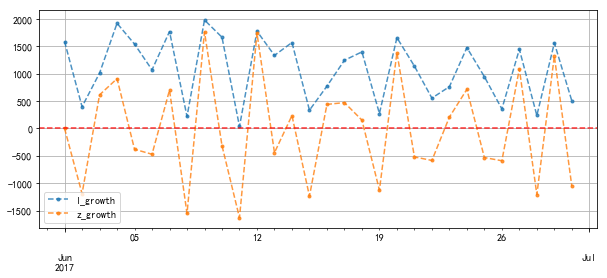

In [30]:
data['base'] = 1000  # 假设基期销售额为1000，后面每一天都为计算期
# 通过折线图查看增长量情况
data['l_growth'] = data['A'] - data['base']  # 累计增长量 = 报告期水平 - 固定基期水平
data['z_growth'] = data['A'] - data.shift(1)['A']  # 逐期增长量 = 报告期水平 - 报告期前一期水平
data[data.isnull()] = 0  # 替换缺失值
# data
data[['l_growth','z_growth']].plot(figsize = (10,4),style = '--.',alpha = 0.8)  
plt.axhline(0,color='r',linestyle="--",alpha=0.8)  # 添加y轴参考线
plt.legend(loc = 'lower left')
plt.grid()


                      A  base     l_growth     z_growth    lspeed    zspeed
2017-06-01  2587.981757  1000  1587.981757     0.000000  1.587982       NaN
2017-06-02  1397.426499  1000   397.426499 -1190.555258  0.397426 -0.460032
2017-06-03  2010.834093  1000  1010.834093   613.407594  1.010834  0.438955
2017-06-04  2921.285690  1000  1921.285690   910.451596  1.921286  0.452773
2017-06-05  2541.316666  1000  1541.316666  -379.969023  1.541317 -0.130069
------


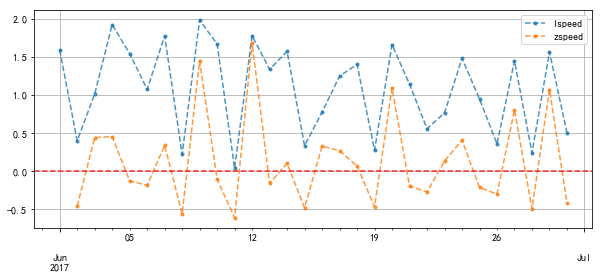

In [33]:
# 通过折线图查看发展速度
data['lspeed'] = data['l_growth'] / 1000  # 定基增长速度
data['zspeed'] = data['z_growth'] / data.shift(1)['A']  # 环比增长速度
data[['lspeed','zspeed']].plot(figsize = (10,4),style = '--.',alpha = 0.8)  
plt.axhline(0,color='r',linestyle="--",alpha=0.8)  # 添加y轴参考线
plt.grid()
print(data.head())
print('------')

# 三、统计分析
统计指标对定量数据进行统计描述，常从集中趋势和离中趋势两个方面进行分析

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## C1 集中趋势度量
指一组数据向某一中心靠拢的倾向，核心在于寻找数据的代表值或中心值 —— 统计平均数，中位数，位置平均数
### 1. 算数平均数与加权算数平均数

In [8]:
# 创建数据
data = pd.DataFrame({
    'value':np.random.randint(100,120,100),
    'f':np.random.rand(100)
})

# f为权重，这里将f列设置为总和为1的权重占比
data['f'] = data['f']/data['f'].sum()
print(data.head())
print('---------')

# 简单算数平均数 = 总和 / 样本数量（不涉及权重）
mean = data['value'].mean()
print('简单算数平均值为：%.2f' % mean)

# 加权算数平均值 = (x1f1 + x2f2 + ... + xnfn)/(f1+f2+...+fn)
mean_w = (data['value'] * data['f']).sum() / data['f'].sum()
print('加权算数平均值为：%.2f' % mean_w)

   value         f
0    115  0.008026
1    103  0.015201
2    101  0.006196
3    114  0.008227
4    107  0.016720
---------
简单算数平均值为：110.32
加权算数平均值为：110.42


### 2. 位置平均数：众数、中位数、平均值、密度曲线

众数为 [115]
中位数为111
   value         f
0    115  0.008026
1    103  0.015201
2    101  0.006196
3    114  0.008227
4    107  0.016720


Text(115.32, 0.015, '中位数：111')

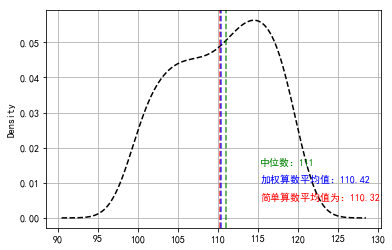

In [17]:
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文

# 众数是一组数据中出现次数最多的数，这里可能返回多个值
m = data['value'].mode()
print('众数为',m.tolist())



# 中位数指将总体各单位标志按照大小顺序排列后，中间位置的数字
med = data['value'].median()
print('中位数为%i' % med)


print(data.head())
# 密度曲线
data['value'].plot(kind = 'kde',style = '--k',grid = True)

# 添加y轴标注线和文字标注
# 简单算数平均值
plt.axvline(mean,color='r',linestyle="--",alpha=0.8)  
plt.text(mean + 5,0.005,'简单算数平均值为：%.2f' % mean, color = 'r')


# 加权算数平均值
plt.axvline(mean_w,color='b',linestyle="--",alpha=0.8)  
plt.text(mean + 5,0.01,'加权算数平均值：%.2f' % mean_w, color = 'b')

# 中位数
# **这里三个数text显示的横坐标一致，目的是图示效果不拥挤
plt.axvline(med,color='g',linestyle="--",alpha=0.8)  
plt.text(mean + 5,0.015,'中位数：%i' % med, color = 'g')


## C2 离中趋势度量
指一组数据中各数据以不同程度的距离偏离中心的趋势<br>
极差与分位差、方差与标准差、离散系数

### 1. 极差、分位差

                A_sale      B_sale
2017-06-01  642.742136  650.593758
2017-06-02  289.208082  109.233325
2017-06-03  335.337347  426.007469
2017-06-04   77.033440  949.139065
2017-06-05  910.388049  848.735617
------
A销售额的极差为：946.60, B销售额的极差为：955.91
------
A销售额的分位差为：509.43, B销售额的分位差为：475.87
------
[287.97088838 572.55988212 802.23072578]


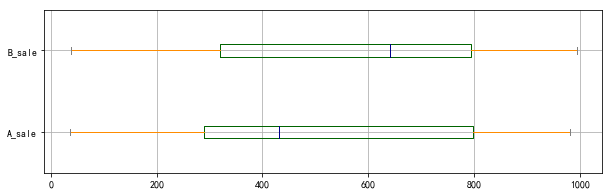

In [23]:
# 创建数据
# A/B销售额量级在同一水平
data = pd.DataFrame({'A_sale':np.random.rand(30)*1000,
                    'B_sale':np.random.rand(30)*1000},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('------')

# 极差
# 没有考虑中间变量的变动，测定离中趋势不稳定
a_r = data['A_sale'].max() - data['A_sale'].min()
b_r = data['B_sale'].max() - data['B_sale'].min()
print('A销售额的极差为：%.2f, B销售额的极差为：%.2f' % (a_r,b_r))
print('------')


# 分位差
sta = data['A_sale'].describe()
stb = data['B_sale'].describe()
#print(sta)
a_iqr = sta.loc['75%'] - sta.loc['25%']
b_iqr = stb.loc['75%'] - stb.loc['25%']
print('A销售额的分位差为：%.2f, B销售额的分位差为：%.2f' % (a_iqr,b_iqr))
print('------')

# 四分位差
data_f = np.array(data['A_sale'])
quartile = np.percentile(data,[25,50,75])
print(quartile)

# 箱型图
# 颜色配置
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
# 画箱线图
data.plot.box(vert=False,grid = True,color = color,figsize = (10,3))


### 2. 方差与标准差

A销售额的标准差为：318.26, B销售额的标准差为：301.32
A销售额的方差为：101287.37, B销售额的方差为：90795.35


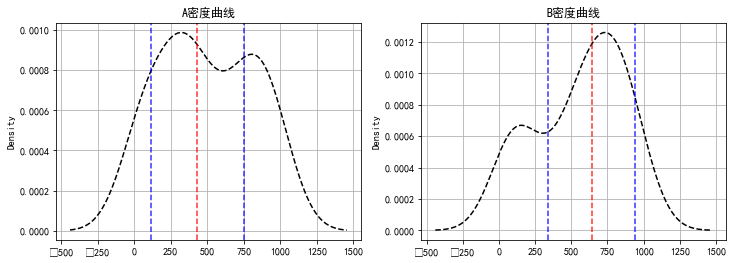

In [31]:
# 方差 → 各组中数值与算数平均数离差平方的算术平均数
# 标准差 → 方差的平方根
# 标准差是最常用的离中趋势指标 → 标准差越大，离中趋势越明显

# 直接使用describe()函数求得的 std来获取标准差
a_std = sta.loc['std']
b_std = stb.loc['std']
# 使用 var()来求方差
a_var = data['A_sale'].var()
b_var = data['B_sale'].var()
print('A销售额的标准差为：%.2f, B销售额的标准差为：%.2f' % (a_std,b_std))
print('A销售额的方差为：%.2f, B销售额的方差为：%.2f' % (a_var,b_var))

# 图片大小
fig = plt.figure(figsize = (12,4))
# 2个子图
ax1 = fig.add_subplot(1,2,1)
data['A_sale'].plot(kind = 'kde',style = 'k--',grid = True,title = 'A密度曲线')
plt.axvline(sta.loc['50%'],color='r',linestyle="--",alpha=0.8)  
plt.axvline(sta.loc['50%'] - a_std,color='b',linestyle="--",alpha=0.8)  
plt.axvline(sta.loc['50%'] + a_std,color='b',linestyle="--",alpha=0.8)  
# A密度曲线，1个标准差

ax2 = fig.add_subplot(1,2,2)
data['B_sale'].plot(kind = 'kde',style = 'k--',grid = True,title = 'B密度曲线')
plt.axvline(stb.loc['50%'],color='r',linestyle="--",alpha=0.8)  
plt.axvline(stb.loc['50%'] - b_std,color='b',linestyle="--",alpha=0.8)  
plt.axvline(stb.loc['50%'] + b_std,color='b',linestyle="--",alpha=0.8)  
# B密度曲线，1个标准差

## C3 describe()
用来展示数据的一些描述性统计信息,其物理意义在于观察这一系列数据的范围、大小、波动趋势等，便于判断后续对数据采取哪种处理类型更合适。

In [27]:
# describe()
# include 设置参数为'all'则输入的所有列都在输出中,设置为'O'(大写的O)则只输出离散型变量的统计信息 
data.describe(include='all')

,A_sale,B_sale
count,30.000000,30.000000
mean,500.672329,559.289809
std,318.256770,301.322664
min,35.295976,38.405405
25%,288.525735,319.057215
50%,431.213176,640.500244
75%,797.951899,794.923401
max,981.899152,994.318217


In [29]:
# 设置输出的百分位数
data.describe(percentiles=[.8,.9])

,A_sale,B_sale
count,30.000000,30.000000
mean,500.672329,559.289809
std,318.256770,301.322664
min,35.295976,38.405405
50%,431.213176,640.500244
80%,822.123116,838.123570
90%,913.940526,899.542797
max,981.899152,994.318217


# 四、帕累托分析
帕累托分析（贡献度分析） → 帕累托法则：20/80定律<br>

“原因和结果、投入和产出、努力和报酬之间本来存在着无法解释的不平衡。一般来说，投入和努力可以分为两种不同的类型：<br>
多数，它们只能造成少许的影响；少数，它们造成主要的、重大的影响。”<br>
→ 一个公司，80%利润来自于20%的畅销产品，而其他80%的产品只产生了20%的利润<br>

例如：<br>
** 世界上大约80％的资源是由世界上15％的人口所耗尽的<br>
** 世界财富的80％为25％的人所拥有；<br>
在一个国家的医疗体系中 ** 20％的人口与20％的疾病，会消耗80％的医疗资源。<br>

一个思路：通过二八原则，去寻找关键的那20%决定性因素！<br>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

A    3077.305055
B    4114.811326
C    3857.830561
D     513.936972
E    5050.345737
F    2693.916197
G    3724.942026
H    4444.004041
I     223.231562
J    3075.966993
dtype: float64
------
E    5050.345737
H    4444.004041
B    4114.811326
C    3857.830561
G    3724.942026
A    3077.305055
J    3075.966993
F    2693.916197
D     513.936972
I     223.231562
dtype: float64
------
超过80%累计占比的节点值索引为： J
超过80%累计占比的节点值索引位置为： 6
------
核心产品为：
E    5050.345737
H    4444.004041
B    4114.811326
C    3857.830561
G    3724.942026
A    3077.305055
J    3075.966993
dtype: float64


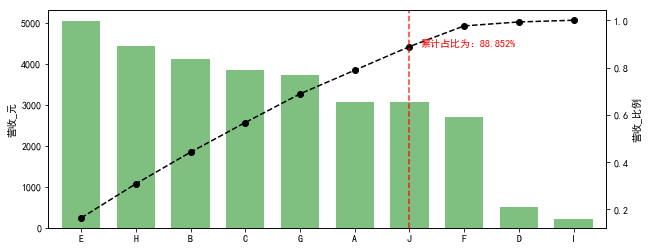

In [47]:
# 创建数据，10个品类产品的销售额
data = pd.Series(np.random.randn(10)*1200+3000,
                index = list('ABCDEFGHIJ'))
print(data)
print('------')

# 由大到小排列
data.sort_values(ascending=False, inplace= True)
print(data)
print('------')

# 创建营收柱状图
plt.figure(figsize = (10,4))
data.plot(kind = 'bar', color = 'g', alpha = 0.5, width = 0.7)  
plt.ylabel('营收_元')

# 找到累计占比超过80%时候的index
# 找到key所对应的索引位置
p = data.cumsum()/data.sum()  # 创建累计占比，Series
key = p[p>0.8].index[0]
key_num = data.index.tolist().index(key) 
print('超过80%累计占比的节点值索引为：' ,key)
print('超过80%累计占比的节点值索引位置为：' ,key_num)
print('------')

# 绘制营收累计占比曲线
p.plot(style = '--ko', secondary_y=True)  # secondary_y → y副坐标轴
plt.axvline(key_num,color='r',linestyle="--",alpha=0.8)  
plt.text(key_num+0.2,p[key],'累计占比为：%.3f%%' % (p[key]*100), color = 'r')  # 累计占比超过80%的节点
plt.ylabel('营收_比例')

# 输出决定性因素产品
# 切片 获取 data 在key之前的所有数据
key_product = data.loc[:key]
print('核心产品为：')
print(key_product)

# 五、正态性检验
利用观测数据判断总体是否服从正态分布的检验称为正态性检验，它是统计判决中重要的一种特殊的拟合优度假设检验。<br>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## F1 直方图&折线图 ， 散点图

       value
0  10.234665
1  10.416581
2   9.768207
3  10.638154
4  11.756976


Text(0.5, 1.0, 'frequency distribution histogram')

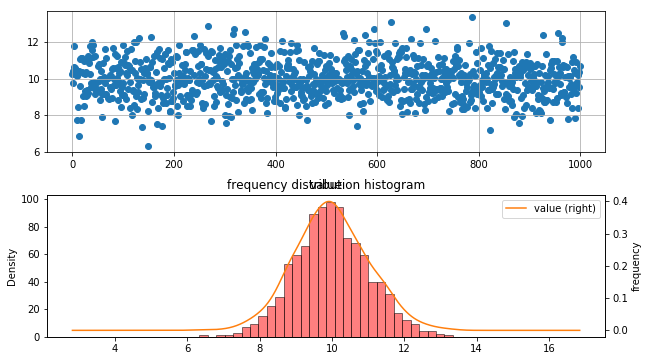

In [12]:
# 创建随机数据
s = pd.DataFrame(np.random.randn(1000)+10,columns =['value'])
print(s.head())

# 绘制数据分布图
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,1,1,) # 创建子图1
ax1.scatter(s.index,s.values)
plt.grid()

# 绘制直方图&折线图 呈现正态性
ax2 = fig.add_subplot(2,1,2,) # 创建子图2
s.hist(bins=30,facecolor='red',edgecolor='black',alpha=0.5,ax=ax2)
s.plot(kind='kde',secondary_y=True,ax=ax2)
plt.xlabel("section")
plt.ylabel('frequency')
plt.title("frequency distribution histogram")

## F2 QQ图
qq图通过把测试样本数据的分位数与已知分布相比较，从而来检验数据的分布情况。<br>
QQ图是一种散点图，对应于正态分布的QQ图，就是由正态分布的分位数为横坐标，样本值为纵坐标的散点图<br>
参考直线：四分之一分位点和四分之三分位点这两点确定，看散点是否落在这条线的附近<br><br>
绘制思路<br>
① 在做好数据清洗后，对数据进行排序（次序统计量：x(1)<x(2)<....<x(n)）<br>
② 排序后，计算出每个数据对应的百分位p{i}，即第i个数据x(i)为p(i)分位数，其中p(i)=(i-0.5)/n （pi有多重算法，这里以最常用方法为主）<br>
③ 绘制直方图 + qq图，直方图作为参考<br>


       value
0  10.293700
1  11.876696
2   8.008228
3   8.939658
4  11.686338
均值为：10.05，标准差为：0.98
------
   index     value       p         q
0    635  6.491542 -0.0005 -3.627230
1    313  7.299261  0.0005 -2.803911
2     47  7.350810  0.0015 -2.751366
3    601  7.401654  0.0025 -2.699540
4    156  7.436512  0.0035 -2.664009
------
四分之一位数为：9.38，四分之三位数为：10.71
------


,index,value,p,q
0,635,6.491542,-0.0005,-3.627230
1,313,7.299261,0.0005,-2.803911
2,47,7.350810,0.0015,-2.751366
3,601,7.401654,0.0025,-2.699540
4,156,7.436512,0.0035,-2.664009


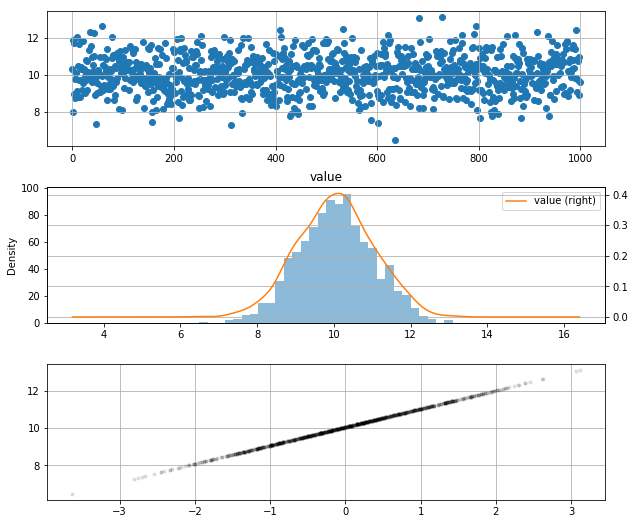

In [13]:
# 创建数据
s = pd.DataFrame(np.random.randn(1000)+10,columns =['value'])
print(s.head())

# 计算均值和标准差
mean = s['value'].mean()
std = s['value'].std()
print('均值为：%.2f，标准差为：%.2f' % (mean,std))
print('------')

# 计算百分位数 p(i)
# 计算q值
s.sort_values(by = 'value', inplace = True)  # 重新排序
s_r = s.reset_index(drop = False)  # 重新排序后，更新index
s_r['p'] = (s_r.index - 0.5) / len(s_r)  
s_r['q'] = (s_r['value'] - mean) / std
print(s_r.head())
print('------')

# 计算四分之一位数、四分之三位数
st = s['value'].describe()
x1 ,y1 = 0.25, st['25%']
x2 ,y2 = 0.75, st['75%']
print('四分之一位数为：%.2f，四分之三位数为：%.2f' % (y1,y2))
print('------')

fig = plt.figure(figsize = (10,9))
ax1 = fig.add_subplot(3,1,1)  # 创建子图1
ax1.scatter(s.index, s.values)
plt.grid()
# 绘制数据分布图

ax2 = fig.add_subplot(3,1,2)  # 创建子图2
s.hist(bins=30,alpha = 0.5,ax = ax2)
s.plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()
# 绘制直方图

ax3 = fig.add_subplot(3,1,3)  # 创建子图3
ax3.plot(s_r['q'],s_r['value'],'k.',alpha = 0.1)
plt.grid()
# 绘制QQ图，直线为四分之一位数、四分之三位数的连线，基本符合正态分布

s_r.head()

## F3 KS检验-理论推导

样本均值为：79.74，样本标准差为：5.94
------
实际观测D值为：0.1597


,血糖浓度,次数,累计次数,累计频率,标准化取值,理论分布,D
0,68,2,2,0.057143,-1.977701,0.0244,0.032743
1,72,2,4,0.114286,-1.304031,0.0968,0.017486
2,75,2,6,0.171429,-0.798779,0.2148,0.043371
3,76,2,8,0.228571,-0.630362,0.2643,0.035729
4,77,6,14,0.400000,-0.461945,0.3228,0.077200
5,78,3,17,0.485714,-0.293527,0.3859,0.099814
6,80,6,23,0.657143,0.043307,0.5160,0.141143
7,81,3,26,0.742857,0.211725,0.5832,0.159657
8,84,2,28,0.800000,0.716977,0.7611,0.038900
9,86,2,30,0.857143,1.053811,0.8531,0.004043


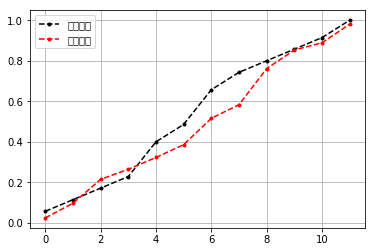

In [14]:
data = [87,77,92,68,80,78,84,77,81,80,80,77,92,86,
       76,80,81,75,77,72,81,72,84,86,80,68,77,87,
       76,77,78,92,75,80,78]
# 样本数据，35位健康男性在未进食之前的血糖浓度

df = pd.DataFrame(data, columns =['value'])
u = df['value'].mean()
std = df['value'].std()
print("样本均值为：%.2f，样本标准差为：%.2f" % (u,std))
print('------')
# 查看数据基本统计量

s = df['value'].value_counts().sort_index()
df_s = pd.DataFrame({'血糖浓度':s.index,'次数':s.values})
# 创建频率数据

df_s['累计次数'] = df_s['次数'].cumsum()
df_s['累计频率'] = df_s['累计次数'] / len(data)
df_s['标准化取值'] = (df_s['血糖浓度'] - u) / std
df_s['理论分布'] =[0.0244,0.0968,0.2148,0.2643,0.3228,0.3859,0.5160,0.5832,0.7611,0.8531,0.8888,0.9803]  # 通过查阅正太分布表
df_s['D'] = np.abs(df_s['累计频率'] - df_s['理论分布'])
dmax = df_s['D'].max()
print("实际观测D值为：%.4f" % dmax)
# D值序列计算结果表格

df_s['累计频率'].plot(style = '--k.')
df_s['理论分布'].plot(style = '--r.')
plt.legend(loc = 'upper left')
plt.grid()
# 密度图表示

df_s

In [15]:
# 直接用算法做KS检验

from scipy import stats
# scipy包是一个高级的科学计算库，它和Numpy联系很密切，Scipy一般都是操控Numpy数组来进行科学计算

data = [87,77,92,68,80,78,84,77,81,80,80,77,92,86,
       76,80,81,75,77,72,81,72,84,86,80,68,77,87,
       76,77,78,92,75,80,78]
# 样本数据，35位健康男性在未进食之前的血糖浓度

df = pd.DataFrame(data, columns =['value'])
u = df['value'].mean()  # 计算均值
std = df['value'].std()  # 计算标准差
stats.kstest(df['value'], 'norm', (u, std))
# .kstest方法：KS检验，参数分别是：待检验的数据，检验方法（这里设置成norm正态分布），均值与标准差
# 结果返回两个值：statistic → D值，pvalue → P值
# p值大于0.05，为正态分布

KstestResult(statistic=0.1590180704824098, pvalue=0.3066297258358026)

# 六、相关性分析
分析连续变量之间的线性相关程度的强弱
<br>
图示初判 / Pearson相关系数（皮尔逊相关系数） / Sperman秩相关系数（斯皮尔曼相关系数）

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

## G1 变量之间的线性相关性 
- 正线性相关
- 负线性相关

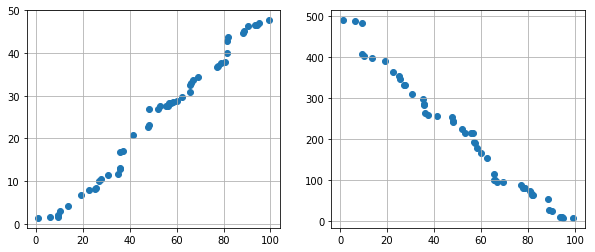

In [17]:
data1 = pd.Series(np.random.rand(50)*100).sort_values()
data2 = pd.Series(np.random.rand(50)*50).sort_values()
data3 = pd.Series(np.random.rand(50)*500).sort_values(ascending = False)
# 创建三个数据：data1为0-100的随机数并从小到大排列，data2为0-50的随机数并从小到大排列，data3为0-500的随机数并从大到小排列，

fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(data1, data2)
plt.grid()
# 正线性相关

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(data1, data3)
plt.grid()
# 负线性相关

## G2 散点图矩阵初判多变量间关系

D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  import sys


,A,B,C,D
0,23.974448,-123.238858,-58.348702,4.027211
1,-8.651980,-37.192540,-169.140141,49.127496
2,-23.154880,78.502943,56.817389,-12.476171
3,47.962864,96.048936,3.713004,-40.637440
4,91.005631,-194.635422,-4.181252,75.076359


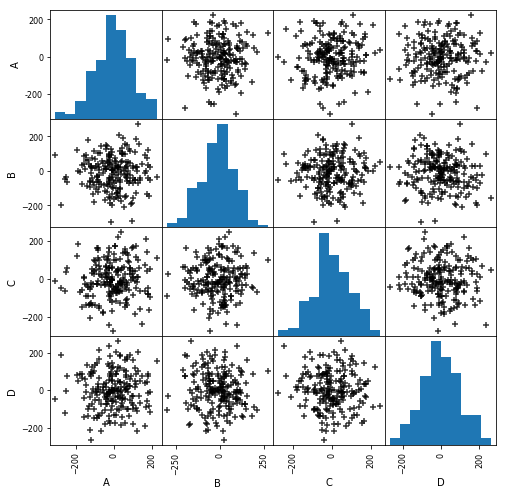

In [18]:
data = pd.DataFrame(np.random.randn(200,4)*100, columns = ['A','B','C','D'])
pd.scatter_matrix(data,figsize=(8,8),
                  c = 'k',
                 marker = '+',
                 diagonal='hist',
                 alpha = 0.8,
                 range_padding=0.1)
data.head()

## G3 Pearson 相关系数

In [19]:
data1 = pd.Series(np.random.rand(100)*100).sort_values()
data2 = pd.Series(np.random.rand(100)*50).sort_values()
data = pd.DataFrame({'value1':data1.values,
                     'value2':data2.values})
print(data.head())
print('------')
# 创建样本数据

u1,u2 = data['value1'].mean(),data['value2'].mean()  # 计算均值
std1,std2 = data['value1'].std(),data['value2'].std()  # 计算标准差
print('value1正态性检验：\n',stats.kstest(data['value1'], 'norm', (u1, std1)))
print('value2正态性检验：\n',stats.kstest(data['value2'], 'norm', (u2, std2)))
print('------')
# 正态性检验 → pvalue >0.05

data['(x-u1)*(y-u2)'] = (data['value1'] - u1) * (data['value2'] - u2)
data['(x-u1)**2'] = (data['value1'] - u1)**2
data['(y-u2)**2'] = (data['value2'] - u2)**2
print(data.head())
print('------')
# 制作Pearson相关系数求值表

r = data['(x-u1)*(y-u2)'].sum() / (np.sqrt(data['(x-u1)**2'].sum() * data['(y-u2)**2'].sum()))
print('Pearson相关系数为：%.4f' % r)
# 求出r
# |r| > 0.8 → 高度线性相关

     value1    value2
0  0.413160  0.016957
1  0.737863  0.530395
2  1.997487  0.889668
3  2.238385  0.912203
4  2.383847  2.134452
------
value1正态性检验：
 KstestResult(statistic=0.08584853231998515, pvalue=0.4328872821397294)
value2正态性检验：
 KstestResult(statistic=0.09068015229851867, pvalue=0.3637401647940619)
------
     value1    value2  (x-u1)*(y-u2)    (x-u1)**2   (y-u2)**2
0  0.413160  0.016957    1218.734533  2565.878827  578.871397
1  0.737863  0.530395    1185.080993  2533.088914  554.428608
2  1.997487  0.889668    1137.791910  2407.882281  537.638589
3  2.238385  0.912203    1131.105860  2384.298487  536.594086
4  2.383847  2.134452    1068.232525  2370.114027  481.462375
------
Pearson相关系数为：0.9961


In [20]:
# Pearson相关系数 - 算法

data1 = pd.Series(np.random.rand(100)*100).sort_values()
data2 = pd.Series(np.random.rand(100)*50).sort_values()
data = pd.DataFrame({'value1':data1.values,
                     'value2':data2.values})
print(data.head())
print('------')
# 创建样本数据

data.corr()
# pandas相关性方法：data.corr(method='pearson', min_periods=1) → 直接给出数据字段的相关系数矩阵
# method默认pearson

     value1    value2
0  0.730873  0.008903
1  1.838231  1.906839
2  3.580419  2.204549
3  6.668790  2.393204
4  8.210650  3.440463
------


,value1,value2
value1,1.000000,0.994627
value2,0.994627,1.000000


In [21]:
# Sperman秩相关系数

data = pd.DataFrame({'智商':[106,86,100,101,99,103,97,113,112,110],
                    '每周看电视小时数':[7,0,27,50,28,29,20,12,6,17]})
print(data)
print('------')
# 创建样本数据

data.sort_values('智商', inplace=True)
data['range1'] = np.arange(1,len(data)+1)
data.sort_values('每周看电视小时数', inplace=True)
data['range2'] = np.arange(1,len(data)+1)
print(data)
print('------')
# “智商”、“每周看电视小时数”重新按照从小到大排序，并设定秩次index

data['d'] = data['range1'] - data['range2']
data['d2'] = data['d']**2
print(data)
print('------')
# 求出di，di2

n = len(data)
rs = 1 - 6 * (data['d2'].sum()) / (n * (n**2 - 1))
print('Pearson相关系数为：%.4f' % rs)
# 求出rs

    智商  每周看电视小时数
0  106         7
1   86         0
2  100        27
3  101        50
4   99        28
5  103        29
6   97        20
7  113        12
8  112         6
9  110        17
------
    智商  每周看电视小时数  range1  range2
1   86         0       1       1
8  112         6       9       2
0  106         7       7       3
7  113        12      10       4
9  110        17       8       5
6   97        20       2       6
2  100        27       4       7
4   99        28       3       8
5  103        29       6       9
3  101        50       5      10
------
    智商  每周看电视小时数  range1  range2  d  d2
1   86         0       1       1  0   0
8  112         6       9       2  7  49
0  106         7       7       3  4  16
7  113        12      10       4  6  36
9  110        17       8       5  3   9
6   97        20       2       6 -4  16
2  100        27       4       7 -3   9
4   99        28       3       8 -5  25
5  103        29       6       9 -3   9
3  101        50       5      10 -5 

In [22]:
# Pearson相关系数 - 算法

data = pd.DataFrame({'智商':[106,86,100,101,99,103,97,113,112,110],
                    '每周看电视小时数':[7,0,27,50,28,29,20,12,6,17]})
print(data)
print('------')
# 创建样本数据

data.corr(method='spearman')
# pandas相关性方法：data.corr(method='pearson', min_periods=1) → 直接给出数据字段的相关系数矩阵
# method默认pearson

    智商  每周看电视小时数
0  106         7
1   86         0
2  100        27
3  101        50
4   99        28
5  103        29
6   97        20
7  113        12
8  112         6
9  110        17
------


,智商,每周看电视小时数
智商,1.000000,-0.175758
每周看电视小时数,-0.175758,1.000000
